# Grid montage

[Instamatic](https://github.com/instamatic-dev/instamatic) is a tool for automated electron diffraction data collection. It has interfaces for interfacing with the TEM (JEOL/TFS) and several cameras (ASI Timepix/Cheetah/TVIPS/Merlin).

This notebook shows how to set up a grid montage.

First, we must import and initialize the controller object, which defines the interface to the TEM and the camera. For this example, the microscope interaction is simulated.

In [1]:
from instamatic import controller
from instamatic.formats import write_tiff

ctrl = controller.initialize()

Config directory: C:\Users\Stef\AppData\Roaming\instamatic\config
Microscope: simulate (server)
Connected to TEM server (localhost:8088)
Camera    : simulate (stream)

Mode: mag1
High tension: 200 kV
Current density: 97742.19 pA/cm2
GunShift(x=60505, y=25230)
GunTilt(x=65302, y=64060)
BeamShift(x=22887, y=27285)
BeamTilt(x=43562, y=33706)
ImageShift1(x=27861, y=23221)
ImageShift2(x=33756, y=41794)
DiffShift(x=3191, y=12694)
Stage(x=-96615.0, y=-95779.0, z=-8981.0, a=-18.6, b=6.0)
Magnification(value=25000, index=10)
DiffFocus(value=n/a)
Brightness(value=45856)
SpotSize(1)
Saved alignments: ('neutral.yaml',)


Next, we will set the image conditions. We want to collect a montage over 5 by 5 points using the `lowmag` mode at a 100x magnification

In [2]:
ctrl.mode.set("lowmag")
ctrl.magnification.value = 100
grid_x, grid_y = 5, 5

## Setting up the grid montage

The grid montage can be set up as follows:

Setting up gridscan.
  Mag: 100x
  Mode: `lowmag`
  Grid: 5 x 5; downup; zigzag: True; flip: True
  Overlap: 0.1

  Image shape: 516 x 516
  Pixel center: [930. 930.]
  Spot size: 1
  Binning: 1


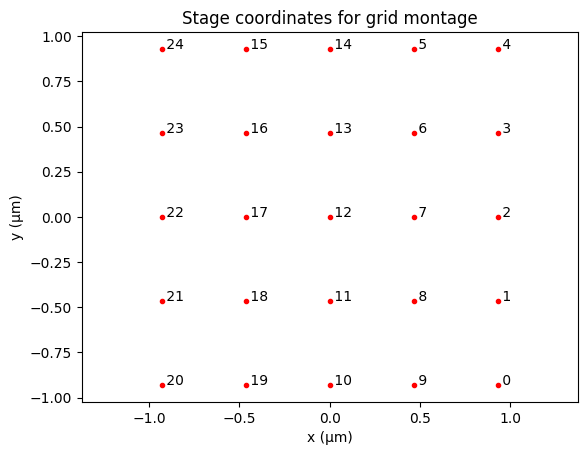

In [3]:
gm = ctrl.grid_montage()
pos = gm.setup(5, 5)

gm.plot()

Internally, the acquisition is done using the `ctrl.acquire_at_points` function. Acquisition is started using `gm.start`. Afterwards, the data are saved to a new experiment directory. The metadata are saved to `montage.yaml` and can be loaded using `Montage.from_montage_yaml`.

In [4]:
gm.start()

Pre-acquire: eliminate_backlash
Acquire[1]: acquire_image

Acquiring on 25 items.
Press <Ctrl-C> or ⬛ to interrupt.

Attempting to eliminate backlash...


  0%|          | 0/25 [00:00<?, ?it/s]

Total time taken: 19 s for 25 items (0.77 s/item)

All done!
 >> Wrote 25 montage images to C:\instamatic\2023-06-09\montage_2


Finally, we use `gm.to_montage` to give us a `Montage` object, which can be used to stitch the images together.

In [5]:
m = gm.to_montage()

First, we can check what the data actually look like. To do so, we can simply stitch and plot the data using a binning=4 to conserve a bit of memory. This naively plots the data at the expected positions. Although this may not always give good results, it's enough to get a feeling for the data.

<Axes: title={'center': 'Stitched image'}>

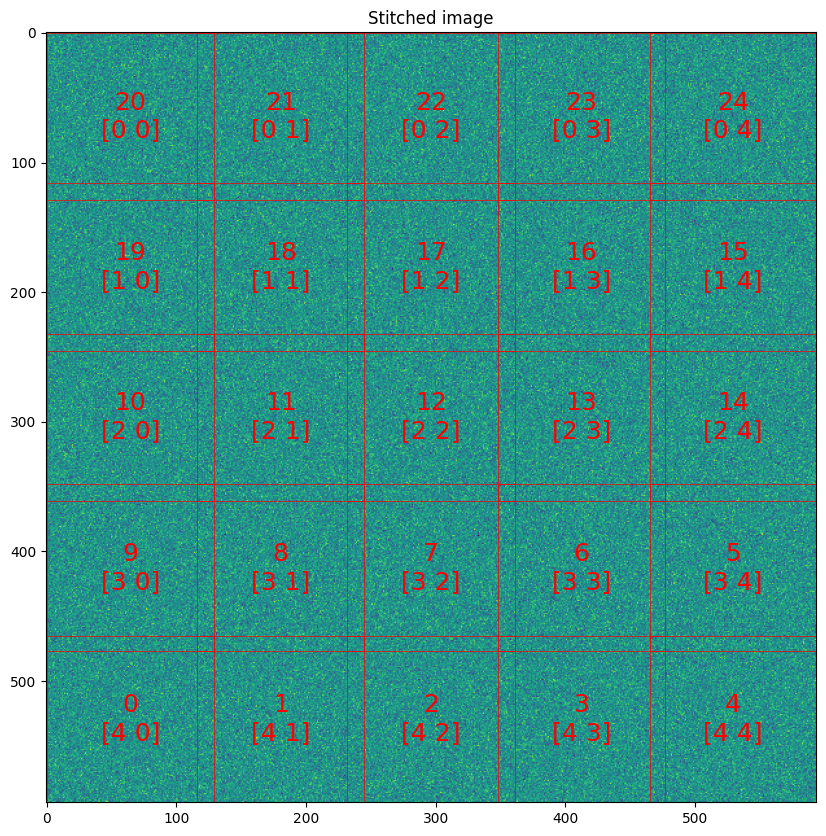

In [6]:
# calculate the montage coordinates
m.calculate_montage_coords()

# stitch image, use binning 4 for speed-up and memory conservation
stitched = m.stitch(binning=4)

# plot the stitched image
m.plot()

Now, since these are simulated data, the stitched image does not show so much. So please see the other notebooks on how to do stitching with real data for better results, and use this image to set up automated acquisitions.